In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


# Points to take into consideration
## Questions:
- Which factor influenced a candidate in getting placed?
- Does percentage matters for one to get placed?
- Which degree specialization is much demanded by corporate?
- Play with the data conducting all statistical tests.

## Regression tasks:
- Develop a simple linear regression model by estimating the model parameters.
- Show the regression plot
- Comment on the R-squared value of the model
- Test for significance of the regression co-efficient based on the summary

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn.model_selection as model_selection
import sklearn.preprocessing as preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



## 1. Importing the data

In [3]:
data_df = pd.read_csv(r'/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
data_df.head(20)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [4]:
print(f'Shape:',data_df.shape)

Shape: (215, 15)


215 rows and 15 columns

In [5]:
# General overview of the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


We have 148 non-null columns for salary, so there are some missing values

**To get the exact number of missing values from the dataset:**

In [6]:
data_df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

So we have 67 null values from the salary column

Whenever the status is **Not Placed**, we have a null salary value.

In [7]:
data_df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

Okay, so do all the values with the status **Not Placed** have the value of **NaN** as salary?

In [8]:
status_df = data_df[data_df['status']=='Not Placed']
status_df

print('shape of the status frame: ', status_df.shape)
print('Number of rows as status **Not Placed**: ',status_df['status'].count() )
print('Number of rows with salary as zero: ', status_df['salary'].isnull().count())

shape of the status frame:  (67, 15)
Number of rows as status **Not Placed**:  67
Number of rows with salary as zero:  67


In [9]:
status_df['salary']

3     NaN
5     NaN
6     NaN
9     NaN
12    NaN
       ..
198   NaN
201   NaN
206   NaN
208   NaN
214   NaN
Name: salary, Length: 67, dtype: float64

So, we see that for every value where status is **Not Placed**, the salary is null

The best option in this case is to remove these rows with the status 'Not Placed'

In [10]:
# Segregating all the numeric and categorical columns

print("All the numeric columns: ", list(data_df.select_dtypes(exclude = ['object'])) )
print("All the categorical columns: ", list(data_df.select_dtypes(include = ['object'])))

All the numeric columns:  ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
All the categorical columns:  ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [11]:
num_col = list(data_df.select_dtypes(exclude = ['object']))
cat_col = list(data_df.select_dtypes(include = ['object']))

In [12]:
data_df[num_col].describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [13]:
data_df[cat_col].describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


## 2. Data visualization

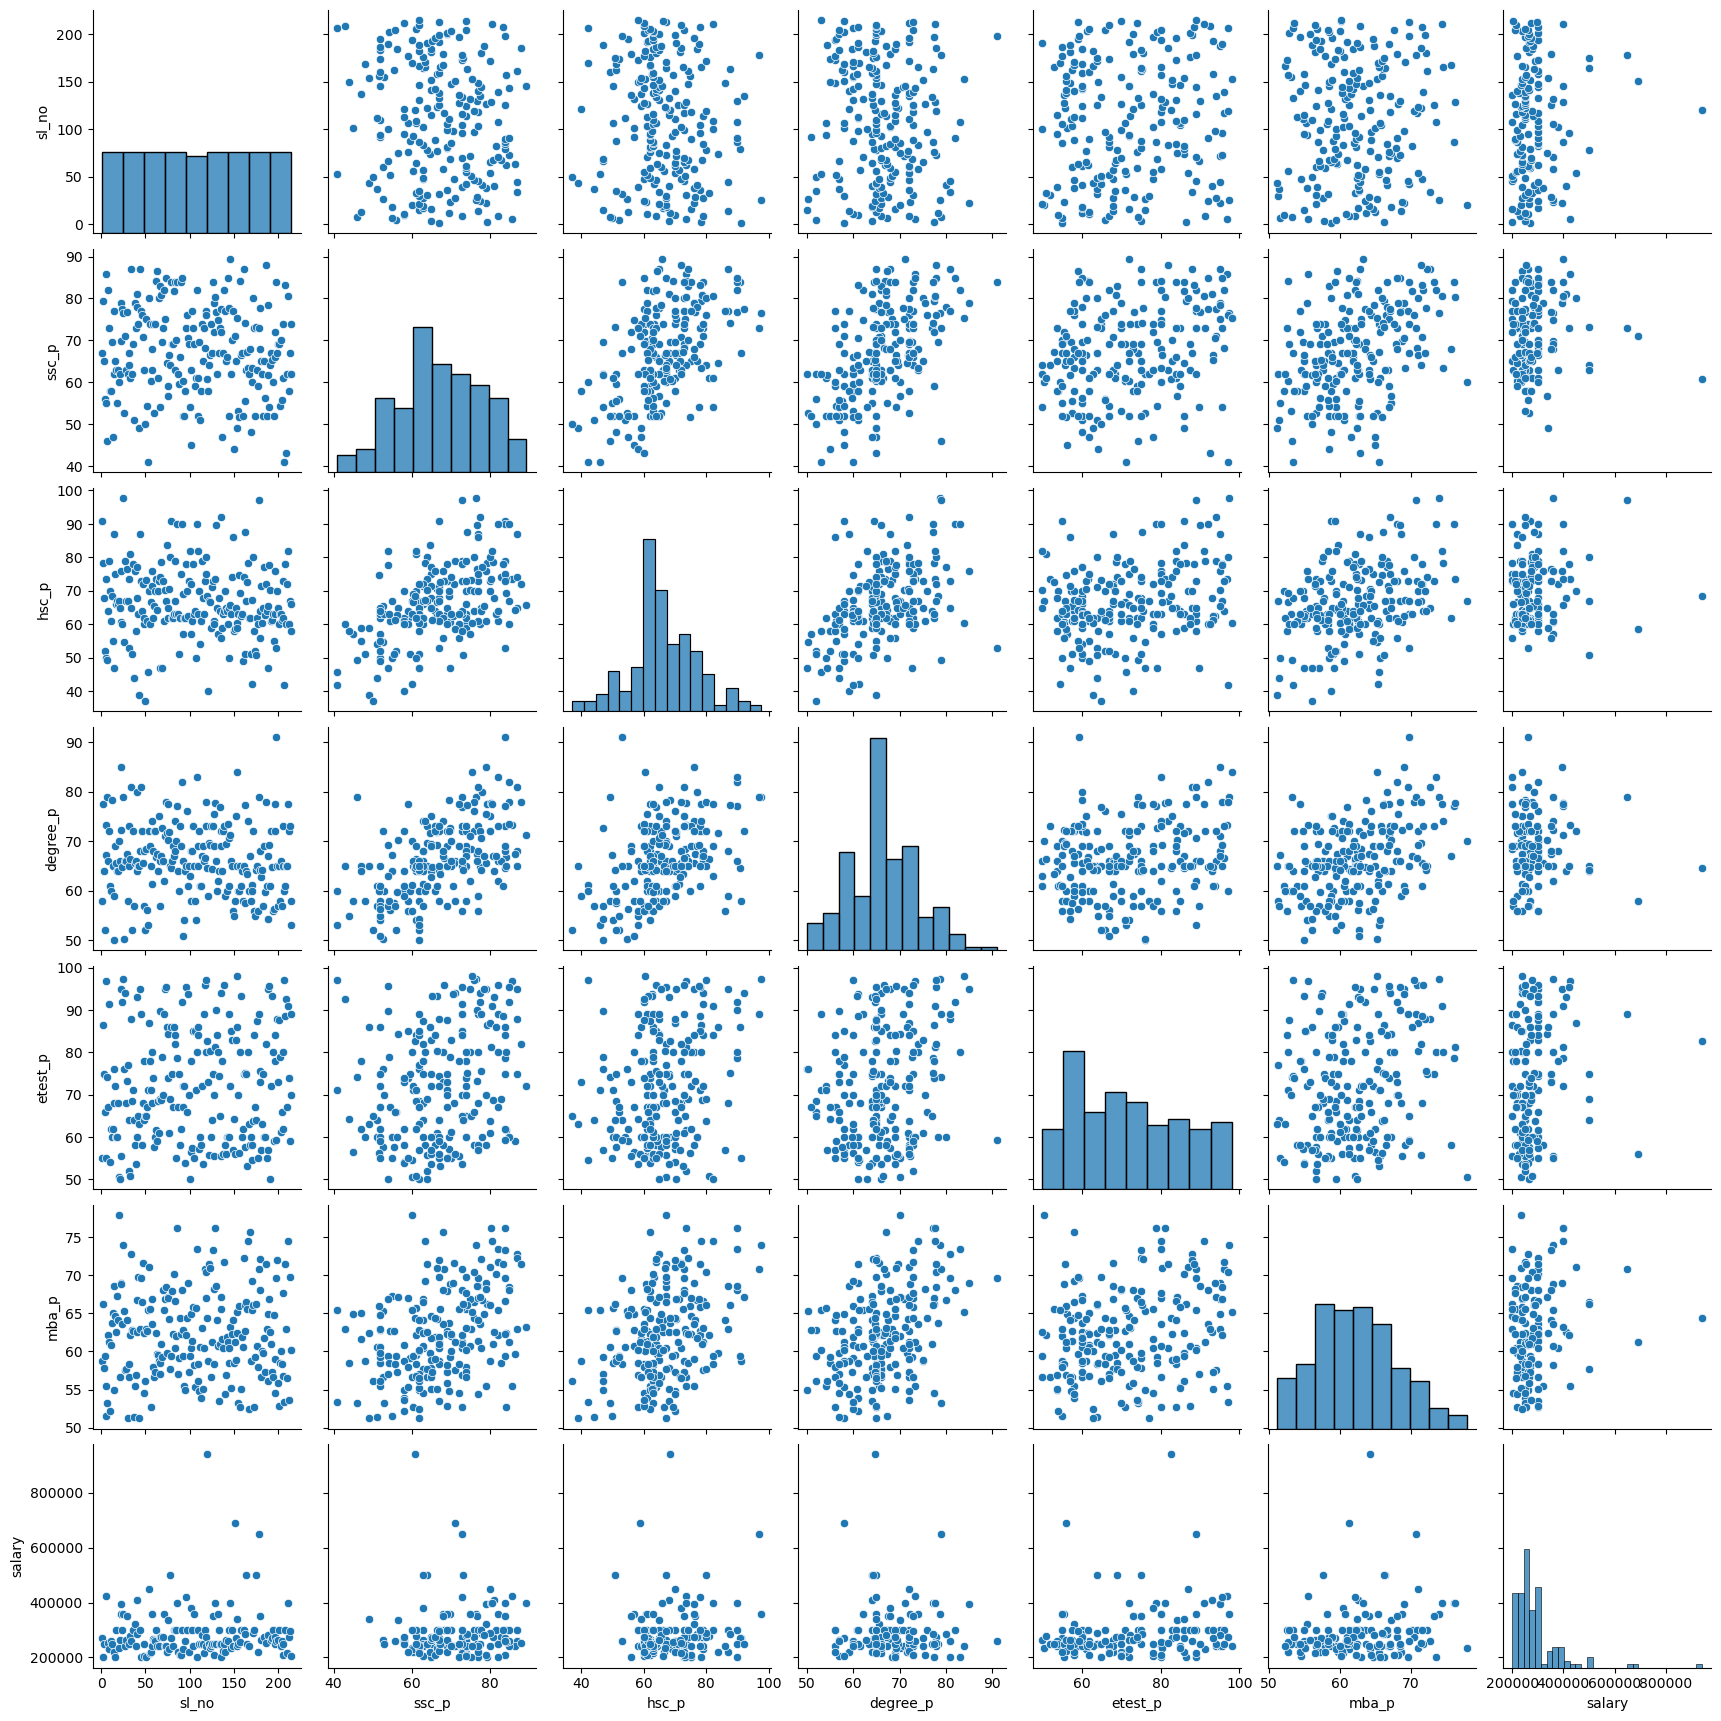

In [14]:
sns.pairplot(data_df[num_col])

Salary has outliers

<AxesSubplot:xlabel='salary'>

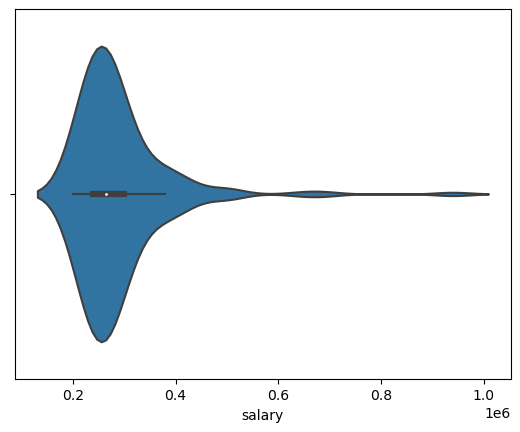

In [15]:
sns.violinplot(x = data_df['salary'])

**Insights**
- There is some multi-collinearity between some of the numerical columns
- The relation between the dependent and independent variables is not very clear due to skewness in the salary column
- In the violin plot, the data is positively skewed and has some outliers. 

So, there needs to be some transformation made.

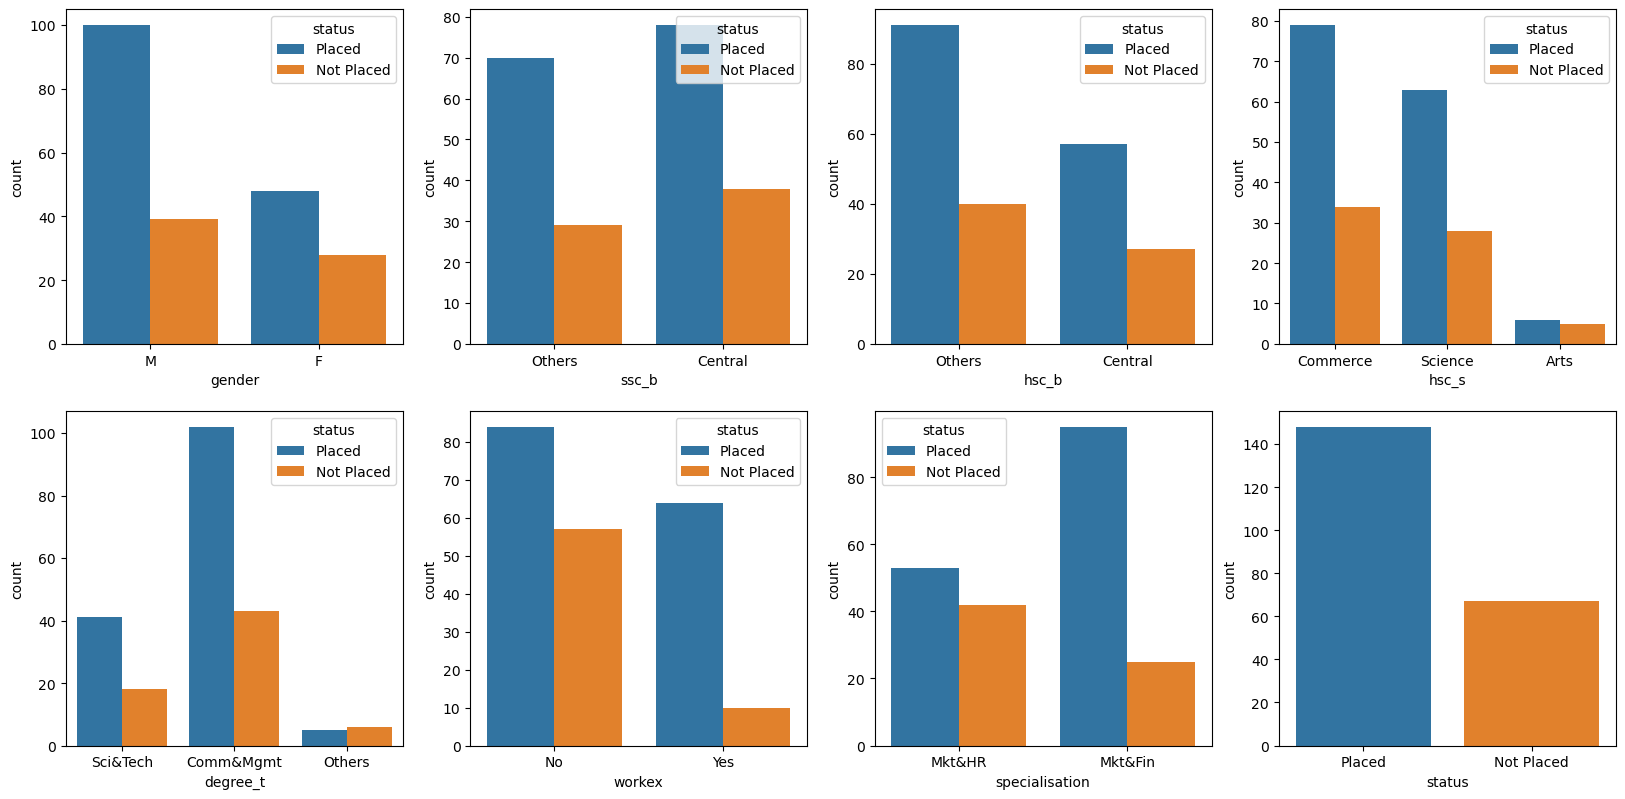

In [16]:
# Change the figure size
plt.figure(figsize = (20, 20))

for i in range(len(cat_col)):
    plt.subplot(4, 4, i+1)
    if(i<7):
        sns.countplot(x = data_df[cat_col[i]], hue = data_df['status'])
    else:
        sns.countplot(x = data_df[cat_col[i]])
plt.show()

<AxesSubplot:>

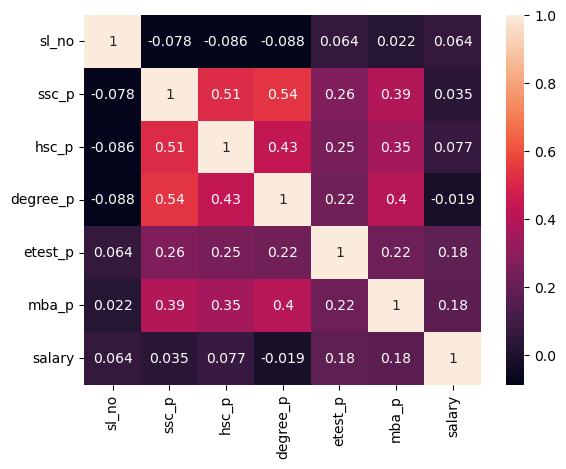

In [17]:
sns.heatmap(data_df.corr(), annot = True)

- **hsc_p** and **ssc_p** have a high correlation (0.51)
- **degree_p** and **ssc_p** have a high correlation (0.54)
- **degree_p** and **hsc_p** have a high correlation (0.43)
- **mba_p** and **ssc_p** have a high correlation (0.39)

So, we'll remove the **hsc_p, degree_p and mba_p** and keep **ssc_p** because the **ssc_p** explains the 3 columns as well

## 3. Data transformation

### 3.1 Missing value treatment

In [18]:
# Dropping the rows with null salaries or Not Placed status
transform_df_1 = data_df.dropna(axis = 0)

In [19]:
transform_df_1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [20]:
# Dropping the hsc_p, degree_p and mba_p columns
transform_df_2 = transform_df_1.drop(['hsc_p','degree_p', 'mba_p'], axis =1)
transform_df_2

,sl_no,gender,ssc_p,ssc_b,hsc_b,hsc_s,degree_t,workex,etest_p,specialisation,status,salary
0,1,M,67.00,Others,Others,Commerce,Sci&Tech,No,55.0,Mkt&HR,Placed,270000.0
1,2,M,79.33,Central,Others,Science,Sci&Tech,Yes,86.5,Mkt&Fin,Placed,200000.0
2,3,M,65.00,Central,Central,Arts,Comm&Mgmt,No,75.0,Mkt&Fin,Placed,250000.0
4,5,M,85.80,Central,Central,Commerce,Comm&Mgmt,No,96.8,Mkt&Fin,Placed,425000.0
7,8,M,82.00,Central,Central,Science,Sci&Tech,Yes,67.0,Mkt&Fin,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,Central,Commerce,Comm&Mgmt,No,67.0,Mkt&Fin,Placed,216000.0
210,211,M,80.60,Others,Others,Commerce,Comm&Mgmt,No,91.0,Mkt&Fin,Placed,400000.0
211,212,M,58.00,Others,Others,Science,Sci&Tech,No,74.0,Mkt&Fin,Placed,275000.0
212,213,M,67.00,Others,Others,Commerce,Comm&Mgmt,Yes,59.0,Mkt&Fin,Placed,295000.0


<AxesSubplot:xlabel='salary'>

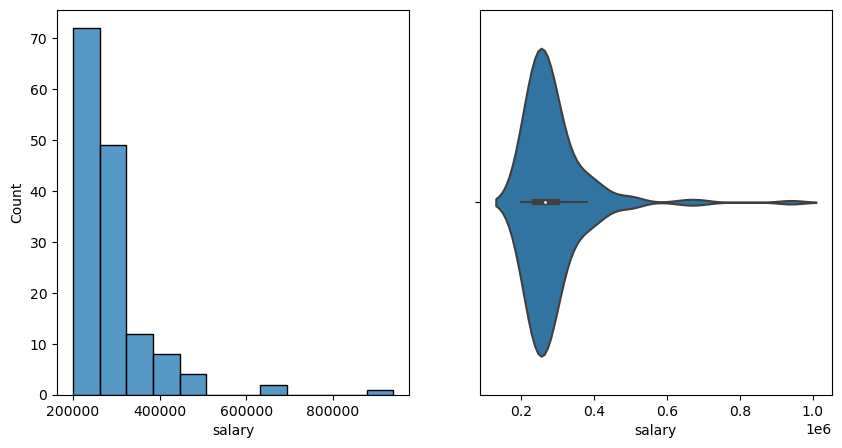

In [21]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
sns.histplot(transform_df_1['salary'], bins=12)

plt.subplot(1, 2, 2)
sns.violinplot(x = transform_df_1['salary'])


### 3.2 Log Transformation

From the above graphs, the data is not normalized
We'll need to normalize this data using log transformation

So, basically, in log transformation we make the values normalized by applying the log of the values, i.e
let's take a value 12

x = 12
np.log(x) will be 2.48...

To convert it back to 12, we'll do:
exp(np.log(x)) = 12

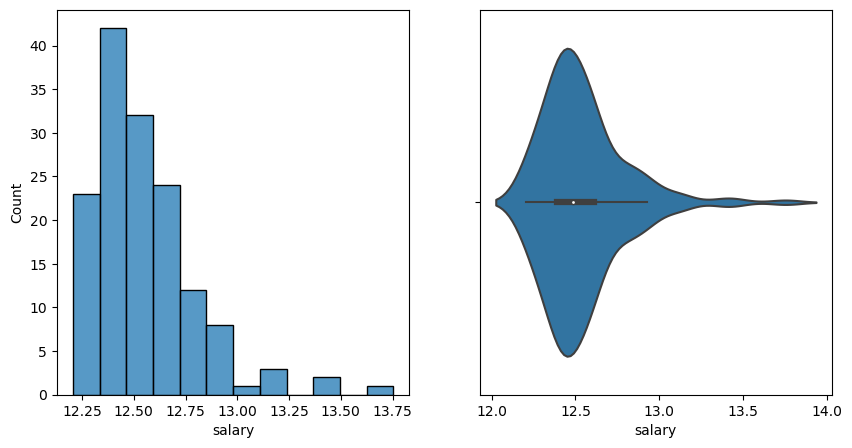

In [22]:
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
sns.histplot(np.log(transform_df_1['salary']), bins=12)

plt.subplot(1, 2, 2)
sns.violinplot(x = np.log(transform_df_1['salary']))

plt.show()



### 3.3 Outlier treatment

In [23]:
# IQR
Q1 = np.percentile(transform_df_1['salary'], 25, interpolation = 'midpoint')
Q3 = np.percentile(transform_df_1['salary'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

# Upper bound
upper = np.where(transform_df_1['salary'] >= (Q3 + (1.5*IQR)), transform_df_1.index, -1)
upper = upper[upper > -1]
print('Upper: ', upper)

lower = np.where(transform_df_1['salary'] <= (Q1 - (1.5*IQR)), transform_df_1.index, -1)
lower = lower[lower > -1]
print('Lower: ', lower)

Upper:  [  4  21  39  53  77  85  95 119 128 145 150 163 174 177 210]
Lower:  []
